In [1]:
%matplotlib inline

import matplotlib.pyplot as plt ; plt.style.use(['fivethirtyeight', '00_mplrc'])
import numpy as np
from scipy.linalg import eigh
np.set_printoptions(suppress=False, linewidth=120)

from IPython.display import HTML
HTML(open('00_custom.css').read())

# 2 DOF System



The data that describes our system and its loading,

$$\boldsymbol p(t) = p_0\,\begin{Bmatrix}0\\1\end{Bmatrix}\sin 2\omega_0\,t$$

In [2]:
M = np.array(((2.0, 0.0), ( 0.0, 1.0)))
K = np.array(((3.0,-2.0), (-2.0, 2.0)))
p = np.array(( 0.0, 1.0))
w = 2.0

## Computing the eigenvalues and the eigenvectors

Using the `eigh` library function, specialized for Hermitian (symmetric) matrices.

We compute also the _starred_ matrices.

In [3]:
evals, Psi = eigh(K, M)
Mstar = Psi.T@M@Psi
Kstar = Psi.T@K@Psi
pstar = Psi.T@p

The `@` operator stands, in this context, for matrix multiplication.

We print the computed values.

In [4]:
print(evals,end='\n\n')
print(Psi,end='\n\n')
print(Mstar,end='\n\n')
print(Kstar,end='\n\n')
print(pstar,end='\n\n')
print(Mstar[0,1]*150*10E6*1000)

[ 0.31385934  3.18614066]

[[-0.54177432 -0.45440135]
 [-0.64262055  0.76618459]]

[[  1.00000000e+00  -5.55111512e-17]
 [ -5.55111512e-17   1.00000000e+00]]

[[  3.13859338e-01   5.55111512e-17]
 [  0.00000000e+00   3.18614066e+00]]

[-0.64262055  0.76618459]

-8.32667268469e-05


## Modal Response

The modal eq., divided by $m$
$$ \ddot q_i + \Lambda^2\omega_0^2 q = \frac{p_0}{k}\frac{k}{m}\,p^\star_i \sin2\omega_0t$$

the particular integral is

$$\xi_i = \Delta_{st} \frac{\omega_0^2}{(\Lambda^2-4)\omega_0^2}p^\star_i\sin2\omega_0t$$

and the response, starting from rest conditions is

$$q_i = \frac{\Delta_{st}}{\Lambda^2-4}p^\star_i(\sin2\omega_0t-\beta\sin\Lambda_i\omega_0t).$$

In [5]:
L  = np.sqrt(evals)
DAF = 1.0/(L**2-w**2)
beta = w/L
t = np.linspace(0,60,601)[:,None]
q = pstar*DAF*(np.sin(w*t)-beta*np.sin(L*t))

The definition of time vectoris a bit complicated...

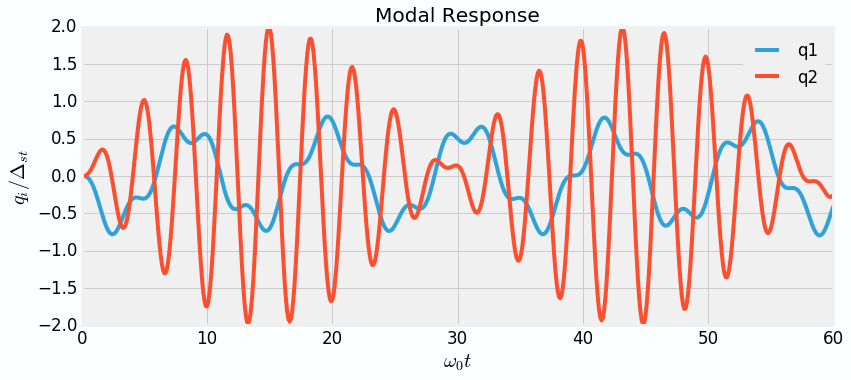

In [6]:
curves = plt.plot(t,q)
plt.legend(curves,['q1', 'q2'])
plt.title('Modal Response')
plt.xlabel('$\omega_0t$')
plt.ylabel('$q_i/\Delta_{st}$');

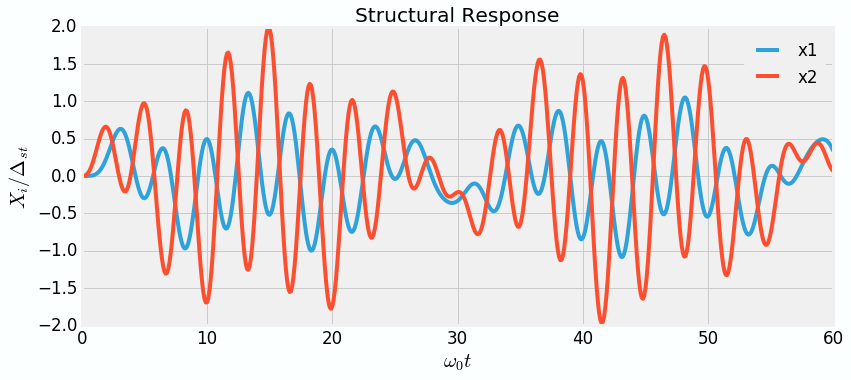

In [7]:
x = (Psi@q.T).T

curves = plt.plot(t, x)
plt.legend(curves,['x1', 'x2'])
plt.title('Structural Response')
plt.xlabel('$\omega_0t$')
plt.ylabel('$X_i/\Delta_{st}$');